In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('C:\\Users\\Felipe\\Downloads\\df_nota_redac_ausente.csv')

In [26]:
df.head(2)

,id,gp_idade,sexo,est_civil,raca,sit_ens_med,ano_conclusao,tp_escola,tp_ensino,treineiro,present_cien,present_hum,present_port,present_mat,nota_cien,nota_hum,nota_port,nota_mat,esp_ing,nota_redac
0,210057943671,14,M,2,2,1,2,1,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,NaN
1,210057516120,14,M,2,1,1,16,1,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,NaN


In [27]:
#valores ausentes em nota de redação
df['nota_redac'].isna().sum()

982663

In [28]:
#diferentes valores em nota de redação
df['nota_redac'].value_counts()

600.0     143777
560.0     140869
580.0     131221
0.0       129827
640.0     115979
620.0     112907
540.0     103907
680.0      98096
520.0      97525
660.0      88881
720.0      86730
760.0      79317
700.0      77423
800.0      75100
840.0      74675
880.0      74374
740.0      69311
480.0      65318
500.0      64209
900.0      64089
780.0      63691
860.0      63254
920.0      63243
820.0      62562
460.0      43853
940.0      42337
360.0      42033
440.0      41878
400.0      28400
420.0      25950
340.0      25411
380.0      21588
960.0      21372
320.0      20957
300.0      10685
280.0       8489
980.0       6042
260.0       3695
240.0       2443
220.0        753
200.0        518
160.0        176
180.0        165
120.0         94
40.0          91
80.0          72
140.0         50
60.0          43
1000.0        32
100.0         30
Name: nota_redac, dtype: int64

In [30]:
df['nota_redac'].describe().round()

count    2493442.0
mean         618.0
std          212.0
min            0.0
25%          520.0
50%          620.0
75%          760.0
max         1000.0
Name: nota_redac, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   gp_idade       int64  
 2   sexo           object 
 3   est_civil      int64  
 4   raca           int64  
 5   sit_ens_med    int64  
 6   ano_conclusao  int64  
 7   tp_escola      int64  
 8   tp_ensino      float64
 9   treineiro      int64  
 10  present_cien   int64  
 11  present_hum    int64  
 12  present_port   int64  
 13  present_mat    int64  
 14  nota_cien      float64
 15  nota_hum       float64
 16  nota_port      float64
 17  nota_mat       float64
 18  esp_ing        int64  
 19  nota_redac     float64
dtypes: float64(6), int64(13), object(1)
memory usage: 530.4+ MB


In [32]:
#Os valores ausentes em notas de redação são os mesmos ausentes em português, as provas são no mesmo dia, assume-se a ausência em ambas
df.loc[(df['present_port'] == 0) | (df['present_port'] == 2), 'nota_redac'] = 0

In [33]:
df['nota_redac'].isna().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   gp_idade       int64  
 2   sexo           object 
 3   est_civil      int64  
 4   raca           int64  
 5   sit_ens_med    int64  
 6   ano_conclusao  int64  
 7   tp_escola      int64  
 8   tp_ensino      float64
 9   treineiro      int64  
 10  present_cien   int64  
 11  present_hum    int64  
 12  present_port   int64  
 13  present_mat    int64  
 14  nota_cien      float64
 15  nota_hum       float64
 16  nota_port      float64
 17  nota_mat       float64
 18  esp_ing        int64  
 19  nota_redac     float64
dtypes: float64(6), int64(13), object(1)
memory usage: 530.4+ MB


In [36]:
quant_disciplina= 5
df['media_final']= ((df['nota_cien']+df['nota_hum']+df['nota_port']+df['nota_mat']+df['nota_redac'])/quant_disciplina)

In [37]:
df.head(10)

,id,gp_idade,sexo,est_civil,raca,sit_ens_med,ano_conclusao,tp_escola,tp_ensino,treineiro,...,present_hum,present_port,present_mat,nota_cien,nota_hum,nota_port,nota_mat,esp_ing,nota_redac,media_final
0,210057943671,14,M,2,2,1,2,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.00
1,210057516120,14,M,2,1,1,16,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.00
2,210057280536,5,F,1,2,1,2,1,0.0,0,...,1,1,1,421.1,546.0,498.8,565.3,1,760.0,558.24
3,210055724397,6,M,1,3,1,2,1,0.0,0,...,1,1,1,490.7,388.6,357.8,416.0,1,320.0,394.62
4,210055097896,4,M,0,3,1,1,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.00
5,210057850231,5,F,1,3,1,2,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,1,0.0,0.00
6,210056305481,4,M,1,2,1,2,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.00
7,210055778089,6,F,1,2,1,0,1,0.0,0,...,1,1,1,398.1,427.3,400.2,404.9,1,440.0,414.10
8,210057252239,8,F,1,3,1,0,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,1,0.0,0.00
9,210055461467,4,F,1,3,1,1,1,0.0,0,...,1,1,1,467.5,461.0,466.7,435.3,1,360.0,438.10


In [39]:
df['media_final'].describe().round()

count    3476105.0
mean         379.0
std          254.0
min            0.0
25%            0.0
50%          487.0
75%          570.0
max          856.0
Name: media_final, dtype: float64

In [40]:
df['nota_cien'].describe().round()

count    3476105.0
mean         336.0
std          239.0
min            0.0
25%            0.0
50%          443.0
75%          513.0
max          875.0
Name: nota_cien, dtype: float64

In [41]:
df['nota_hum'].describe().round()

count    3476105.0
mean         378.0
std          247.0
min            0.0
25%            0.0
50%          490.0
75%          560.0
max          839.0
Name: nota_hum, dtype: float64

In [42]:
df['nota_port'].describe().round()

count    3476105.0
mean         371.0
std          242.0
min            0.0
25%            0.0
50%          483.0
75%          554.0
max          801.0
Name: nota_port, dtype: float64

In [43]:
df['nota_mat'].describe().round()

count    3476105.0
mean         368.0
std          271.0
min            0.0
25%            0.0
50%          453.0
75%          578.0
max          986.0
Name: nota_mat, dtype: float64

In [44]:
df['nota_redac'].describe().round()

count    3476105.0
mean         444.0
std          331.0
min            0.0
25%            0.0
50%          560.0
75%          700.0
max         1000.0
Name: nota_redac, dtype: float64

In [45]:
df.isna().sum()

id               0
gp_idade         0
sexo             0
est_civil        0
raca             0
sit_ens_med      0
ano_conclusao    0
tp_escola        0
tp_ensino        0
treineiro        0
present_cien     0
present_hum      0
present_port     0
present_mat      0
nota_cien        0
nota_hum         0
nota_port        0
nota_mat         0
esp_ing          0
nota_redac       0
media_final      0
dtype: int64

## Conclusão do Pré-Processamento

In [46]:
df.head()

,id,gp_idade,sexo,est_civil,raca,sit_ens_med,ano_conclusao,tp_escola,tp_ensino,treineiro,...,present_hum,present_port,present_mat,nota_cien,nota_hum,nota_port,nota_mat,esp_ing,nota_redac,media_final
0,210057943671,14,M,2,2,1,2,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.00
1,210057516120,14,M,2,1,1,16,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.00
2,210057280536,5,F,1,2,1,2,1,0.0,0,...,1,1,1,421.1,546.0,498.8,565.3,1,760.0,558.24
3,210055724397,6,M,1,3,1,2,1,0.0,0,...,1,1,1,490.7,388.6,357.8,416.0,1,320.0,394.62
4,210055097896,4,M,0,3,1,1,1,0.0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.00


<Axes: >

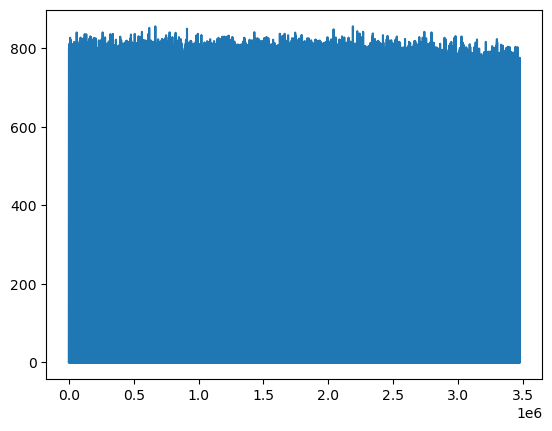

In [48]:
df['media_final'].plot()